In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt

**state**: the gambler's money. $s \in \{0,1,...,100\}$.

there are two terminating states: s=0 and s=100. the gambler stops when he has no more money or reaches his goal(has 100 dollars)

**asction**: the amoun of money the gambler bets. $a(s) \in \{0, 1, ..., min(s, 100-s)\}$

at state s, the gambler has s dollars. he cannot bet more than his capital so $a(s)\leq s$. also his goal is to get exactly 100 dollars so $a(s) \leq 100-s$ so $a(s) \leq min(s, 100-s)$

**reward**: if the gambler reaches his goal, he gets reward of 1. otherwise he gets reward of 0.



**state action value**

we define a function called "state_action_values" that gets a specific state s,  all state values and rewards and returns the updated state value with the corresponding action:


for $a \in A(s)$:

   $Q(s,a)=\sum_{s' }P^a_{ss'}[R^a_{ss'} + \gamma V(s')]$





$R^a_{ss'}$ is the immidiate award which is zero for all transitions execpt for the transition that delivers the goal state. so 


1.   if $s'=100 : R^a_{ss'}=1$
2.   o.w: $R^a_{ss'}=0$



$A(s)$ is all possible actions that can happen at state s. $A(s) = \{1, ..., min(s, 100-s)\}$

by taking the action a, the gambler bets with a dollars. his action has two possible outcomes:


1.   he loses the bet with probability of $1-p_h$. so he loses $a$ dollars and  his capital would be $s-a$. so the nex state would be $s'=s-a$
2.    he wins the bet with probability of $p_h$. so he wins $a$ dollars and  his capital would be $s+a$. so the nex state would be $s'=s+a$

$\gamma $ is the discount factor


In [ ]:
def state_action_values(s, V, rewards,discount_factor,p_h):
        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) 
        for a in stakes:

            A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
        return A

**Value Iteration**

we define a function called "value_iteration" that gets the rewards for each transition. it initializes state values and updates all state values untill convergence.

we have 101 states. we first define all state values {$V(S)$} as 0(the ith element corresponds to the ith state wich means the gambler has i dollars).
The reward is zero on all transitions except the ones that the gambler reaches his goal, in that case the rewars is +1.

for each state, after calculating all state action values of that space with the "state_action_values" function,  we update the state value using the formula below:

$V(s)= max_a Q(s,a)$

we update the all state values untill convergence. in order to check the convergence:

for each state, we calculate the absolute difference between the old and the new state value and define $\Delta = max_s |v(s)_{old} - v(s)_{new}|$.

we  also get thershlod $\theta$. the convergence condition would be when $\Delta < \theta$.




In [ ]:
def value_iteration(p_h, rewards, theta, discount_factor):
    V = np.zeros(101)
    while True:
        delta = 0
        for s in range(1, 100):
            Q = state_action_values(s, V, rewards,discount_factor,p_h)       
            best_action_value = np.max(Q)      
            delta = max(delta, np.abs(best_action_value - V[s]))  
            V[s] = best_action_value         
        if delta < theta:
            break

    return V

**best policy**

we define a function called "find policy".it gets the best state values and the transition rewards as input and gives the array of best actions (the best policy) for the output. for each state we calculate all the corresponding state-action values using the "state_action_values" function and find the best action as below:

 $best\ action=argmax_a Q(s,a)$

In [ ]:

def best_policy(V,rewards,discount_factor,p_h):
    policy = np.zeros(100)
    for s in range(1, 100):
        # One step lookahead to find the best action for this state
        Q = state_action_values(s, V, rewards,discount_factor,p_h)
        best_action = np.argmax(Q)
        # Always take the best action
        policy[s] = best_action
    
    return policy

**gambler results**

we define a function called "gambler_result" that first initializes the awards. then executes the value iteration algorithm using the "value iteration" function and then finds the best policy from the state values using the "best_policy"  function. 

rewar initialization:

as said before, all transitions have 0 reward except the transition that reaches the gamblre's goal:

$r_{ss'}^a=$

1.   $1: if\ s'=100$
2.   $0: \ o.w$

so we defne an array with length of 101.the array is zero  exepct for the last elemnt which is 1(when gambler reaches his goal)



In [ ]:
def gambler_results(p_h, theta=0.0001, discount_factor=1.0):
    rewards = np.zeros(101)
    rewards[100] = 1 
    V=value_iteration(p_h, rewards, theta=0.0001, discount_factor=1.0)
    policy = best_policy(V,rewards,discount_factor,p_h)
    
    return policy, V

In [ ]:
def plot(p_h):
        plt.figure(figsize=(15, 5)) 
        policy, v = gambler_results(p_h)
        x = range(100)
        y = policy
        plt.subplot(1, 2, 1)
        plt.bar(x, y, align='center', alpha=0.5)
        plt.xlabel('s (state)')
        plt.ylabel('Policy(s)')
        plt.title(f'Optimized State Policy for ph = {p_h}')
        y = v[:100]
        plt.subplot(1, 2, 2)
        plt.plot(x,y)
        plt.xlabel('s (state)')
        plt.ylabel('V(s)')
        plt.title(f'Optimized State Value for ph = {p_h}')


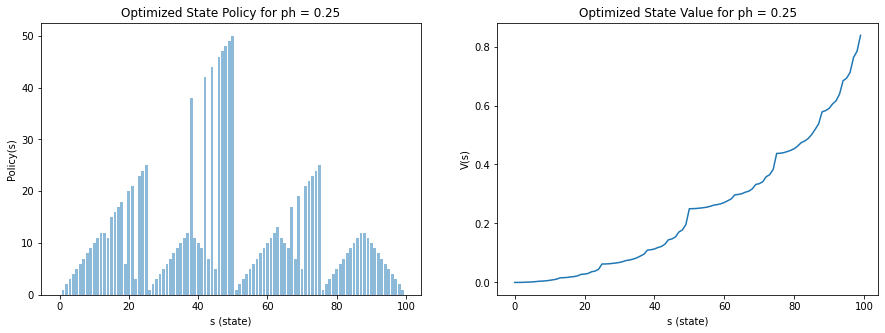

In [ ]:
p_h=[0.25,0.55]
plot(p_h[0])
plot(p_h[1])

we can see that as we, the state values increase as we reach the final states. when $p_h=0.55$, the state values increases quickly an converges to 1, also the best policy is to to always bet 1 dollars. this could be explained by the fact that the probability to win the bet is more than te probability to lose the bet, so if we bet 1 dollars at each state, we win more than we lose, so the termination state would be the state that we reach our goal(not the state that we run out of money). when $p_h=0.25$, as we reach the final states, not only the state values increase, but the difference between the states also increases. the best policy is to generally increase and decrease our bet every 0.25*100=25 states. also in some states that we have nearly 25, 50, and 75 dollars, we increase the amount of the bet( we repeat the same policy so we bet the most amount of money when we have nearly 50 dollars). this could be explained by the fact that the probabilty to win is much smaller than the probability to loose, so in some states we need to bet a lot of money to reach our goal faster (becouse the amount of imes that we loose is more than the times we win). in the rest of the states we hould gradually increase(to reach our goal faster) and decrease(prevent from losing all our money). also the scope of tangent line in the state values increases and decreases corresponding to the aoun of bet in that state. when we bet alot of money, the difference between the two state increases so the scope of tangent line increases, and when we bet less moey, the difference between the two state decreases so the scope of tangent line decreases. but the state values always increase as we reach the final(our goal) state.